In [2]:
import torch
from torch import nn

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")

image_path = data_path / "pizza_steak_sushi"
if image_path.is_dir():
    print(f"{image_path} already exists")
else:
    print(f"{image_path} do not exists")
    image_path.mkdir(parents=True, exist_ok=True)
    
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloaded pizza_steak_suchi.zip...")
    f.write(request.content)
    
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipped pizza_steak_suchi.zip...")
    zip_ref.extractall(image_path)

data/pizza_steak_sushi already exists
Downloaded pizza_steak_suchi.zip...
Unzipped pizza_steak_suchi.zip...


In [5]:
# walking thorugh the directory
import os

def walk_through_dir(dir_path):
    """walk_through_dir returning its contents.
    
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [6]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [7]:
#set um test and train directories

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [8]:
### visualizing the data

pizza
Random image path: data/pizza_steak_sushi/train/pizza/393658.jpg
Random image class: pizza
Hight: 383, Width: 512


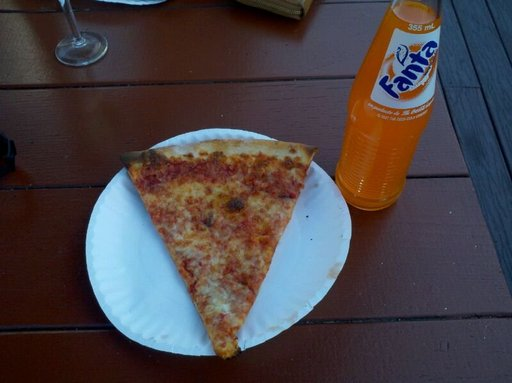

In [9]:
import random
from PIL import Image


#random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

#print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Random image class: {image_class}")
print(f"Hight: {img.height}, Width: {img.width}")

img


In [10]:
#vizualization with matplotlib
import matplotlib.pyplot as plt
import numpy as np

(np.float64(-0.5), np.float64(511.5), np.float64(382.5), np.float64(-0.5))

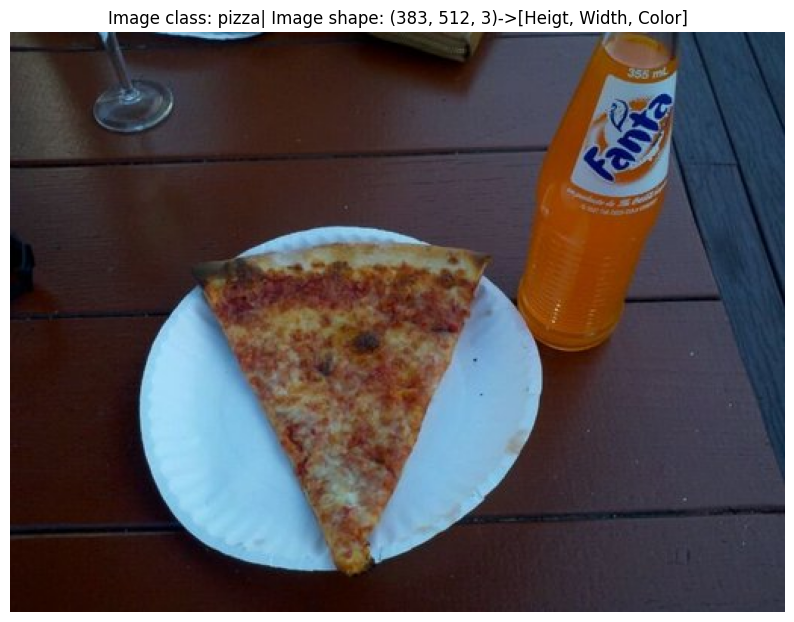

In [11]:
#into array:

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 10))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class}| Image shape: {img_as_array.shape}->[Heigt, Width, Color]")
plt.axis("off")

In [12]:
img_as_array[:1]

array([[[70, 63, 55],
        [60, 53, 45],
        [55, 51, 42],
        ...,
        [32, 58, 81],
        [32, 58, 81],
        [33, 59, 82]]], shape=(1, 512, 3), dtype=uint8)

In [13]:
#transofming data

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [14]:
data_transform(img)

tensor([[[0.2549, 0.2196, 0.1804,  ..., 0.1176, 0.1255, 0.1255],
         [0.2039, 0.2000, 0.1725,  ..., 0.1137, 0.1294, 0.1294],
         [0.2196, 0.2314, 0.2157,  ..., 0.1137, 0.1333, 0.1333],
         ...,
         [0.1412, 0.1412, 0.1451,  ..., 0.2235, 0.2157, 0.2118],
         [0.1412, 0.1412, 0.1451,  ..., 0.2196, 0.2078, 0.2078],
         [0.1373, 0.1373, 0.1412,  ..., 0.2078, 0.2039, 0.2039]],

        [[0.2353, 0.1922, 0.1216,  ..., 0.2118, 0.2275, 0.2275],
         [0.1882, 0.1843, 0.1333,  ..., 0.2118, 0.2314, 0.2314],
         [0.2118, 0.2235, 0.1922,  ..., 0.1961, 0.2353, 0.2392],
         ...,
         [0.0314, 0.0314, 0.0314,  ..., 0.2235, 0.2235, 0.2196],
         [0.0314, 0.0314, 0.0314,  ..., 0.2196, 0.2157, 0.2157],
         [0.0314, 0.0314, 0.0275,  ..., 0.2118, 0.2118, 0.2118]],

        [[0.1961, 0.1490, 0.0824,  ..., 0.3059, 0.3176, 0.3176],
         [0.1843, 0.1765, 0.1216,  ..., 0.3020, 0.3216, 0.3216],
         [0.2039, 0.2078, 0.1765,  ..., 0.2941, 0.3255, 0.

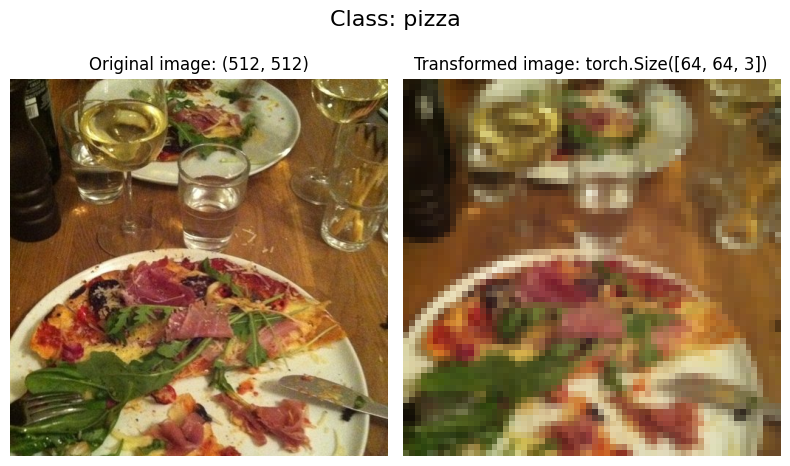

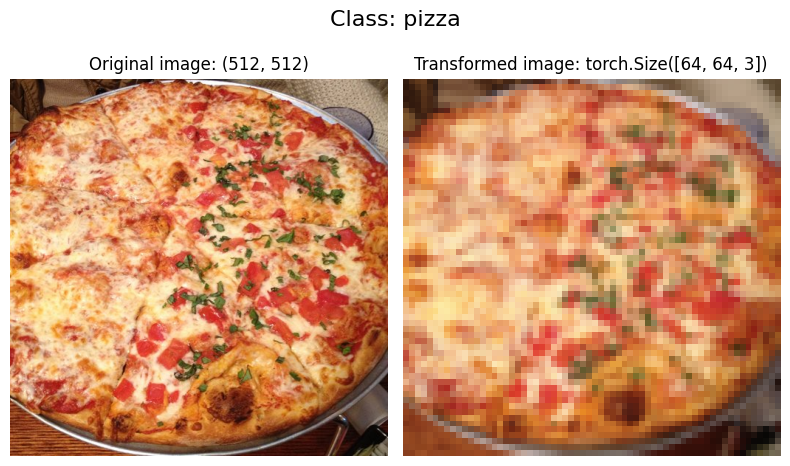

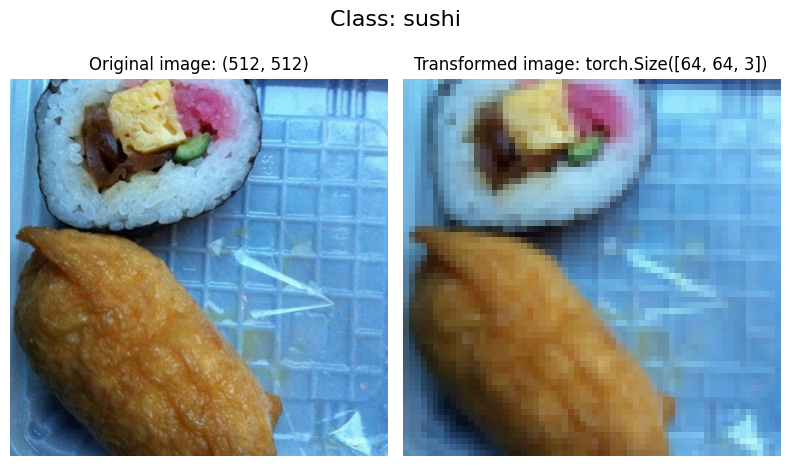

In [29]:
import random
from PIL import Image
import matplotlib.pyplot as plt

def plot_transform_image(image_path: list, transform, n=3, seed=None):
    """Select images from a list of image paths and plot them with transformations."""
    if seed:
        random.seed(seed)
    random_image_path = random.sample(image_path, k=n)
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
            # Plot the original image
            ax[0].imshow(f)
            ax[0].set_title(f"Original image: {f.size}")
            ax[0].axis(False)

            # Transform and plot the transformed image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed image: {transformed_image.shape}")
            ax[1].axis(False)

            # Add a suptitle
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
            plt.tight_layout()
            plt.show()

# Example usage
plot_transform_image(image_path=image_path_list,
                     transform=data_transform,
                     n=3,
                     seed=None)


In [33]:
#into tensors:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform,
                                 target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [37]:
class_dic = train_data.class_to_idx
class_dic

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [40]:
len(train_data), len(test_data)

(225, 75)

In [42]:
img, label = train_data[0][0], train_data[0][1]
img

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [44]:
label

0

original shape: torch.Size([3, 64, 64]), permute shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

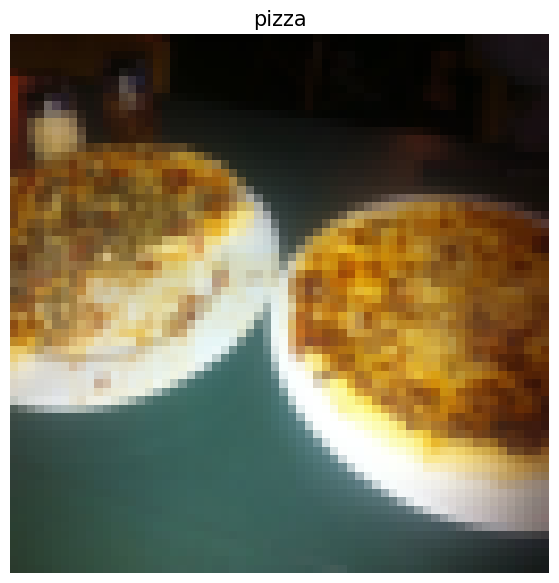

In [57]:
img_permute = img.permute(1,2,0)

print(f"original shape: {img.shape}, permute shape: {img_permute.shape}")


plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=15)



In [58]:
#load images into dataLoader

In [ ]:
sdf

In [ ]:
sd